# Widzenie komputerowe - Laboratoria nr 11

## Opis laboratoriów

Wprowadzenie do biblioteki TensorFlow oraz neuronowych modeli wizyjnych.

## Funkcje pomocnicze

### Niezbędne biblioteki


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import PIL

from pprint import pprint

### Zbiory danych

- MNIST - popularny zbiór danych przedstawiający obrazki o rozmiarze 28x28 zawierające odręczne pismo w postaci cyfr. Więcej informacji pod [linkiem](http://yann.lecun.com/exdb/mnist/).

### Wizualizacja



Skrypt do wyżwietlania obrazów BGR oraz Grayscale.

In [ ]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

# TensorFlow

TensorFlow to jedna z wiodących bibliotek do uczenia maszynowego raz przetwarzania big data. Biblioteka wspierana i rozwijana jest przez zespół Google Brain. 

Architektura TensorFlow jest bardzo podobna do popularnej biblioteki NumPy, do tego stopnia, że niektóre podstawowe operacje działają analogicznie w obu z nich.

Najczęstszym zastosowaniem TensorFlow są prace z sieciami neuronowymi zarówno w postaci badawczej jak i komercyjnej. Oprócz podstawowych operacji metematycznych potrzebnych do przetwarzania sieci neuronowych biblioteka TensorFlow zawiera szereg funkcjonalności pozwalających na wykorzystanie systemów opartych na TensorFlow w środowiskach produkcyjnych na różnych platformach - od urządzeń webowych przez wewnętrzne zastosowania klastrowe po urządzenia mobilne.

## Wstęp do TensorFlow 2.0

Wiele operacji w TensorFlow i NumPy wygląda bardzo podobnie, zaczynając od alokacji danych:

In [ ]:
np_arr = np.zeros([5, 5])
tf_arr = tf.zeros([5, 5])

np_arr = np.ones([5, 5])
tf_arr = tf.ones([5, 5])

np_arr = np.array([1, 2, 3, 4, 5])
tf_arr = tf.constant([1, 2, 3, 4, 5])

np_arr = np.random.normal(0, 1, [5, 5])
tf_arr = tf.random.normal([5, 5], 0, 1)

print('NumPy array:\n', np_arr, '\n')
print('Tensorflow array:\n', tf_arr, '\n')

NumPy array:
 [[-0.94253299  2.01356778  0.09632248 -0.92100145 -0.13136741]
 [-0.6027478   1.0236821   0.72545776 -3.18740025 -1.70483719]
 [ 1.67678483  0.70567096  0.56537041 -1.44574219 -0.62472593]
 [-0.30040715 -1.31645101  0.85454476  1.39590927 -0.76326215]
 [-1.70703004  0.11390831 -0.02697127  0.8825468  -0.36952339]] 

Tensorflow array:
 tf.Tensor(
[[ 0.904297   -1.2355479  -1.0459094   1.2265586   0.5153785 ]
 [-0.46957168  0.7162702   0.8307047  -1.8149093   0.03321667]
 [ 0.8896911   1.0176688  -0.32550395 -1.3368597   0.3659757 ]
 [ 0.04672508 -2.1104105   0.9189098  -0.63306147  0.06269299]
 [-1.1084383  -0.5523081  -0.3924524  -1.7805231   2.3831115 ]], shape=(5, 5), dtype=float32) 



przez operacje na danych:

In [ ]:
np_a = np.ones([5, 5])
tf_a = tf.ones([5, 5])

np_a = np_a + np_a
np_a = np_a * np_a
np_a = np_a ** 2 + np_a ** 3

tf_a = tf_a + tf_a
tf_a = tf_a * tf_a
tf_a = tf_a ** 2 + tf_a ** 3

print('NumPy array:\n', np.sqrt(np_a), '\n')
print('Tensorflow array:\n', tf.sqrt(tf_a), '\n')

NumPy array:
 [[8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]
 [8.94427191 8.94427191 8.94427191 8.94427191 8.94427191]] 

Tensorflow array:
 tf.Tensor(
[[8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]
 [8.944272 8.944272 8.944272 8.944272 8.944272]], shape=(5, 5), dtype=float32) 



TensorFlow zawiera implementacje funkcji redukcji wymiarowości, m.in. suma, średnia, minimum, maximum.

In [ ]:
print('TensorFlow sum:', tf.reduce_sum(tf_a))
print('TensorFlow mean:', tf.reduce_mean(tf_a))
print('TensorFlow min:', tf.reduce_min(tf_a))
print('TensorFlow max:', tf.reduce_max(tf_a))

print('TensorFlow sum:', np_a.sum())
print('TensorFlow mean:', np_a.mean())
print('TensorFlow min:', np_a.min())
print('TensorFlow max:', np_a.max())

TensorFlow sum: tf.Tensor(2000.0, shape=(), dtype=float32)
TensorFlow mean: tf.Tensor(80.0, shape=(), dtype=float32)
TensorFlow min: tf.Tensor(80.0, shape=(), dtype=float32)
TensorFlow max: tf.Tensor(80.0, shape=(), dtype=float32)
TensorFlow sum: 2000.0
TensorFlow mean: 80.0
TensorFlow min: 80.0
TensorFlow max: 80.0


Analogicznie do NumPy, redukcję można wykonać względem ustalonych wymiarów:

In [ ]:
print('TensorFlow sum:', tf.reduce_sum(tf_a, 0))
print('TensorFlow mean:', tf.reduce_mean(tf_a, 1))
print('TensorFlow min:', tf.reduce_min(tf_a, 0))
print('TensorFlow max:', tf.reduce_max(tf_a, 1))

print('TensorFlow sum:', np_a.sum(0))
print('TensorFlow mean:', np_a.mean(1))
print('TensorFlow min:', np_a.min(0))
print('TensorFlow max:', np_a.max(1))

TensorFlow sum: tf.Tensor([400. 400. 400. 400. 400.], shape=(5,), dtype=float32)
TensorFlow mean: tf.Tensor([80. 80. 80. 80. 80.], shape=(5,), dtype=float32)
TensorFlow min: tf.Tensor([80. 80. 80. 80. 80.], shape=(5,), dtype=float32)
TensorFlow max: tf.Tensor([80. 80. 80. 80. 80.], shape=(5,), dtype=float32)
TensorFlow sum: [400. 400. 400. 400. 400.]
TensorFlow mean: [80. 80. 80. 80. 80.]
TensorFlow min: [80. 80. 80. 80. 80.]
TensorFlow max: [80. 80. 80. 80. 80.]


### Zmienne

Ważnym elementem biblioteki TensorFlow są **zmienne**, czyli obiekty, które przechowują pewną wartość i mogą być uaktualniane. Pozostałe wyniki operacji w TensorFlow to **Tensory**.

In [ ]:
# inicjalizacja zmiennej z losowymi wartościami
b = tf.Variable(tf.random.uniform([5]))

print(b.numpy())

# wykonanie operacji dodawania na zmiennej
b.assign_add([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji odejmowania na zmiennej
b.assign_sub([1, 0, 0, 1, 0])

print(b.numpy())

# wykonanie operacji przypisania na zmiennej
b.assign([1, 2, 3, 4, 5])

print(b.numpy())

[0.43524122 0.47396982 0.9328871  0.9637741  0.69657457]
[1.4352412  0.47396982 0.9328871  1.9637741  0.69657457]
[0.43524122 0.47396982 0.9328871  0.9637741  0.69657457]
[1. 2. 3. 4. 5.]


Istnienie zmiennych w TensorFlow jest bardzo ważne ze względu na automatyczne uaktualnianie zmiannych w kontekście uczenia sieci neuronowych.

## Podstawowe operacje neuronowe

Jedną z podstawowych operacji neuronowych jest warstwa **w pełni połączona**, czyli warstwa składająca się z **neuronów**. Każdy neuron wykonuje operację **kombinacji liniowej** z następującą **funkcją aktywacji**:

$$z_j = \sum x_i * w_{ij} + b_j$$
$$y_j = f(z_j)$$

lub innymi słowy, neuron pobiera wektor danych wejściowych, przemnaża go przez wektor **zmiennych uczonych**, sumuje, dodaje wyraz wolny (funkcja liniowa) oraz aplikuje pewną funkcję aktywacji.


In [ ]:
w = tf.Variable(tf.random.uniform([10, 5], dtype=tf.float32))
b = tf.Variable(tf.random.uniform([5], dtype=tf.float32))

print(f'w: {w}\nb: {b}')

w: <tf.Variable 'Variable:0' shape=(10, 5) dtype=float32, numpy=
array([[0.17003942, 0.99568295, 0.02857387, 0.9010258 , 0.21278214],
       [0.8329736 , 0.17403162, 0.39273942, 0.7289101 , 0.7934346 ],
       [0.8177619 , 0.4656546 , 0.16230392, 0.27320886, 0.01186037],
       [0.2851653 , 0.41072845, 0.4749266 , 0.8874247 , 0.0054487 ],
       [0.75829494, 0.6500417 , 0.20769334, 0.48381662, 0.5169252 ],
       [0.5645937 , 0.18502581, 0.24361014, 0.99305713, 0.97824407],
       [0.2850157 , 0.06254983, 0.48600864, 0.53499675, 0.265764  ],
       [0.6733161 , 0.3261243 , 0.05823684, 0.60212016, 0.7604134 ],
       [0.35804784, 0.3912568 , 0.3741343 , 0.7259127 , 0.5005919 ],
       [0.588359  , 0.47600293, 0.57891774, 0.18471885, 0.4728248 ]],
      dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
array([0.5278983, 0.4271971, 0.9222144, 0.8509704, 0.6624371],
      dtype=float32)>


In [ ]:
def neuron(x, f=tf.identity):
  return f(x @ w + b)

In [ ]:
x = tf.random.normal([1, 10])
y = neuron(x)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(1, 10): [[ 0.37501562 -0.13595057 -0.6333114   0.8440328  -0.5287028  -0.98986596
  -1.2336979  -0.82561827  0.17942771  0.17623276]]
y(1, 5): [[-1.4981647   0.10953623  0.34813726 -0.56736934 -1.3927132 ]]


Jak widać na powyższym przykładzie operację kombinacji liniowej dla wielu wektorów (tzn. przetwarzanie można zoptymalizować wykonując operacje neuronu na wielu przykładach na raz) można zrealizować jako mnożenie macierzy.

In [ ]:
x = tf.random.normal([5, 10])
y = neuron(x)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[ 1.1309357  -1.2599107  -0.09468102 -0.04039091 -0.5460529   0.08831213
  -0.93133676  0.5818134   0.08456084  1.7632313 ]
 [-0.22279486 -0.7523849  -0.5195086  -0.15190043 -0.8695138  -0.21128729
   0.6861161  -0.93115586  0.8244947  -0.8840288 ]
 [-1.0114874   1.5669104  -1.0234475   1.5982198  -0.7929202   1.0175995
   1.3526465   0.89628017  2.702125   -0.05405622]
 [ 0.6713353   1.2775375   0.19831286 -0.10202512  1.1789451   1.4768529
   0.5227609  -0.20160168 -0.6178037  -0.97023994]
 [ 0.2902063   0.07162773 -0.8058708   1.054702   -0.71004057  1.0451744
   0.04281199  0.8231544   0.40653422 -0.01771817]]
y(5, 5): [[ 0.4115649   1.9385675   0.9669136   0.95255417  0.7771354 ]
 [-2.039819   -1.1931572   0.30775583 -0.5638182  -1.1760652 ]
 [ 3.1778746   0.95388097  3.8740983   6.062174    4.6407323 ]
 [ 2.7882957   1.6714206   1.4809994   3.9182982   3.0924826 ]
 [ 1.0319209   0.940137    1.6464782   3.3852277   2.2650518 ]]


Powyższa implementacja neuronu wykorzystuje funkcję aktywacji **identity**, czyli brak modyfikacji, a więc jest to funkcja liniowa. Do innych funkcji aktywacji można zaliczyć:
- relu - jedna z ważniejszych operacji ze względu na jej prostą pochodną.,
- sigmoid - jedna z pierwszych aplikowanych funkcji aktywacji w neuronach,
- tangens hiperboliczny - najczęściej wykorzystywana w sieciach rekurencyjnych,
- elu, selu, relu6, itp. - różne modyfikacje funkcji relu.


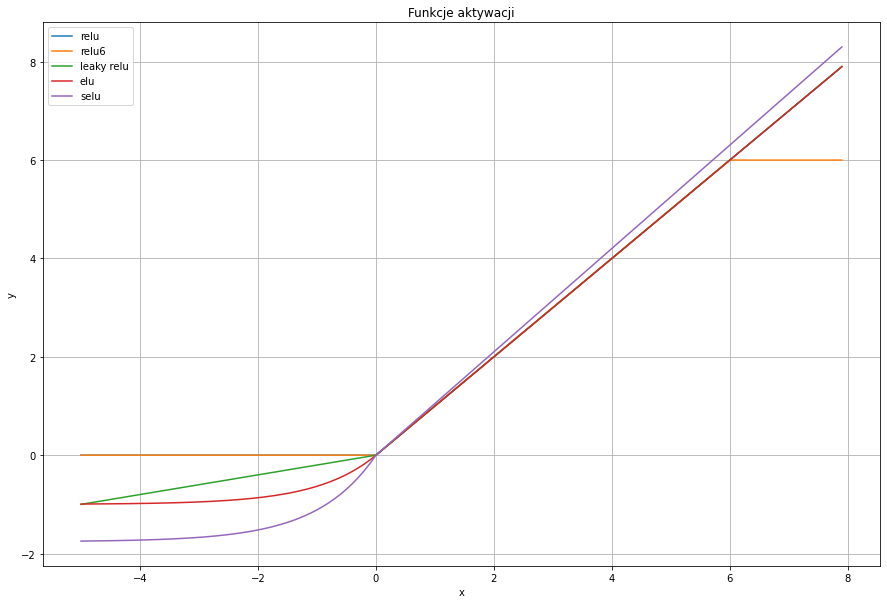

In [ ]:
x = tf.range(-5, 8, 0.1, tf.float32)

plt.figure(figsize=(15, 10))
plt.title('Funkcje aktywacji')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, tf.nn.relu(x), label='relu')
plt.plot(x, tf.nn.relu6(x), label='relu6')
plt.plot(x, tf.nn.leaky_relu(x), label='leaky relu')
plt.plot(x, tf.nn.elu(x), label='elu')
plt.plot(x, tf.nn.selu(x), label='selu')
plt.grid()
plt.legend()
plt.show()

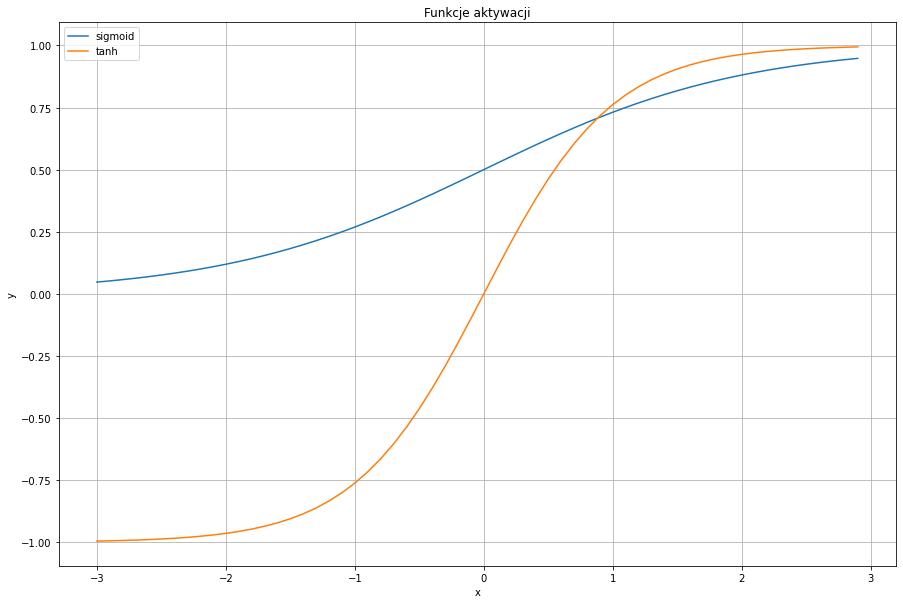

In [ ]:
x = tf.range(-3, 3, 0.1, tf.float32)
plt.figure(figsize=(15, 10))
plt.title('Funkcje aktywacji')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, tf.nn.sigmoid(x), label='sigmoid')
plt.plot(x, tf.nn.tanh(x), label='tanh')
plt.grid()
plt.legend()
plt.show()

In [ ]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.nn.relu)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[ 0.46218073  0.16281448 -0.48709533  0.76968324  0.58793026 -0.5973248
   1.1582193   1.1308368  -0.16892987 -0.04694295]
 [-0.13343762  0.2798538  -1.091322    2.0339437  -0.8713089   1.3090035
  -0.35957608 -0.6075525   0.70801437 -0.8887071 ]
 [ 0.5553598   0.7902553  -1.4301001  -0.87023187 -0.97652376 -0.12988815
   0.2144414  -0.19759044  0.47278637 -0.34375706]
 [-1.1568048  -0.70059425 -0.9724697  -0.30257154 -0.6068995   1.3571516
   0.71115035  0.19876437 -0.56454515  0.3010123 ]
 [ 0.06351107 -1.8286338  -0.93116367  1.6179814   1.0757387  -0.97671443
  -0.9183721   0.16268882 -1.0397979   0.12946552]]
y(5, 5): [[1.6752622  1.6294886  1.8008271  2.796558   1.6689225 ]
 [0.         0.         1.4953458  3.1115065  1.0610218 ]
 [0.         0.         0.4391728  0.4384183  0.734945  ]
 [0.         0.         0.8372873  0.         1.060996  ]
 [0.         0.57211256 0.05769324 0.         0.        ]]


In [ ]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.nn.tanh)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[-0.91975754  0.26567703 -1.5225166  -1.1868745   0.28818774  0.6124332
   0.0684213   1.9632666   0.76488334 -0.16297245]
 [ 0.04606868 -0.9088952   1.3589153   1.5200626  -0.70943993 -0.39534602
  -0.17844813 -1.0025333   0.45275447 -1.4369949 ]
 [-1.1034439  -0.03994056 -2.2760856  -0.67474866  0.7114679   0.878852
  -0.5829868   0.5102687  -0.5767512   0.12361837]
 [ 0.14544207  0.4519881  -0.24547473 -0.05773921  0.35916728  0.46730387
  -1.0928673  -1.5274053  -0.7208845  -0.9256435 ]
 [ 0.89743257 -0.29929626 -1.708209   -0.821516   -0.6560053   1.0508345
  -2.2496123  -0.14374799 -0.34485802 -0.63620615]]
y(5, 5): [[ 0.797963   -0.43974483  0.62790215  0.844926    0.99679947]
 [-0.6895167   0.19036019  0.42826363  0.5215385  -0.9667831 ]
 [-0.58325064 -0.89109504  0.14805517 -0.5201377   0.9210036 ]
 [-0.7136206  -0.4272729  -0.19796747 -0.35192862 -0.5071304 ]
 [-0.9816086  -0.6178642  -0.86588275 -0.5954731   0.09910605]]


Funkcje aktywacji mogą być również zaimplementowane z wykorzystaniem **Keras API**:

In [ ]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.keras.layers.Activation('relu'))

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[ 6.7427021e-01  8.7996349e-02 -1.2741052e+00  9.3449849e-01
   5.5626817e-02  9.9890441e-02 -6.3160676e-01 -2.5327569e-01
   2.0813904e+00  1.3587147e-01]
 [ 1.1318717e+00  8.4256130e-01  8.2201654e-01 -4.1052470e-01
   7.6852554e-01  5.5084977e-04 -8.0023003e-01  4.7765368e-01
   7.3692966e-01 -2.1335207e-01]
 [ 6.7407835e-01 -1.5421171e+00 -3.1623164e-01 -5.8972567e-01
   7.0836532e-01  5.3810704e-01 -6.6381723e-01  2.5145558e-01
  -9.7696923e-02  9.4686076e-02]
 [-1.8656564e+00 -2.0093656e-01  1.0941570e+00 -1.6840550e+00
  -4.2268377e-02 -1.9009569e-01 -1.3420181e-01  2.3033492e-01
   1.2102505e+00  7.8815711e-01]
 [-1.1549485e+00 -2.5192842e-01  8.6807960e-01 -1.7364535e-01
  -7.3866820e-01 -5.7249135e-01 -6.2557805e-01  1.2323414e+00
   1.0052860e-01 -1.5462530e+00]]
y(5, 5): [[0.51362646 1.715972   1.7846158  3.1755528  1.7378997 ]
 [2.7922812  2.7071447  1.1747583  3.0726333  2.3956828 ]
 [0.         1.0478776  0.         0.3444605  0.4785629 ]
 [1.3323209  0.      

In [ ]:
x = tf.random.normal([5, 10])
y = neuron(x, tf.keras.layers.Activation('tanh'))

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')

x(5, 10): [[-0.2509155   0.99914515 -0.15299962  0.9164032   0.09811705 -0.8840432
   0.81757474  1.0392734  -1.1535335   0.36926886]
 [ 0.3551898   1.2525055  -0.03920637 -0.9487198  -0.75897926  0.7542384
  -0.27145356  1.720347   -0.386795    0.21000949]
 [ 0.01691772 -1.1376184  -0.2388163  -0.2996403   0.34179223 -1.1948315
  -0.3311269  -2.2608306   0.25409794 -0.35239312]
 [ 1.264805   -0.06042849 -0.2507748  -0.03462184 -0.4252831   0.28827494
  -1.1731025   0.9523134  -0.69526935  0.5708659 ]
 [ 0.3211044   0.4422247  -1.7001574  -0.78630835 -0.392336   -2.4124358
   0.23785444 -0.8245534   0.70883507  0.559607  ]]
y(5, 5): [[ 0.9431698   0.58571726  0.9428292   0.91987175  0.83230764]
 [ 0.9778227   0.62293583  0.7345624   0.9785322   0.99676967]
 [-0.99327666 -0.67149365 -0.31562176 -0.99160314 -0.99578273]
 [ 0.6117672   0.91522866  0.39275885  0.9004073   0.8556505 ]
 [-0.9770304  -0.6059426   0.41633815 -0.9665152  -0.895678  ]]


Analogicznie, operacja neuronu jest zaimplementowana w **Keras API**.

**Uwaga:** podczas pierwszego wywołania neuronu w zaalokowane zostaną wewnątrzne zmienne uczące się.

In [ ]:
neurons = tf.keras.layers.Dense(5, activation='relu')

In [ ]:
x = tf.random.normal([5, 10])
y = neurons(x)

print(f'x{x.shape}: {x}\ny{y.shape}: {y}')
print('\n\nZmienne wewnętrzne:\n', neurons.trainable_variables)

x(5, 10): [[-1.0805374   1.0206314   0.05198675 -0.21289727 -0.01851472 -0.19038938
  -0.77847224 -0.9356636  -1.2232659   0.11316086]
 [-1.0491174  -0.19502138  1.1331863  -0.5877475  -1.3300604   1.9252828
  -1.3632364  -0.68979466  0.27919894  2.2948046 ]
 [-0.09131771  1.2707394   1.1030567  -2.6680267   1.0893352   0.8989579
   1.1816685  -0.4180434  -0.01765772  1.5271926 ]
 [-2.3744738  -1.6183417  -2.1886492   1.5088726  -0.2924248   0.5872143
   0.8245113   0.09601685 -0.19299874 -2.2986093 ]
 [-1.1500314   0.39041713  2.753642    0.4428214  -0.32556158  2.0591896
  -1.5717707   0.9493372   0.39299968 -0.54938036]]
y(5, 5): [[0.         0.         0.         0.         0.8578953 ]
 [0.         0.         0.         0.98788816 0.8351689 ]
 [0.         0.         2.5888355  0.         0.        ]
 [1.2153339  0.         0.         0.         0.        ]
 [0.         0.         0.         1.1215342  0.72884226]]


Zmienne wewnętrzne:
 [<tf.Variable 'dense/kernel:0' shape=(10, 5) 

Operując biblioteką TensorFlow w kontekście Widzenia Komputerowego, można zauważyć, że posiada ona wiele operacji poznanych wcześniej w ramach klasycznego przetwarzania obrazów. Są to m.in. konwolucja oraz pooling.

**Uwaga:** formalnie, konwolucja jest operacją ''przemnożenia'' **odwróconym** filtrem danych wejściowych. ''Przemnożenie'' **nieodwróconym** filtrem nazywa się operacją **koralacji**. Ze względu na fakt, że w przetwarzaniu neuronowym filtrem są zmienne uczące się, nie ma znaczenia czy odwrócimy czy nie filtr. Dlatego w celach optymalizacyjnych implementacja konwolucji w TensorFlow jest formalnie operacją korelacji.

Poniżej zaprezentowana została implementacja konwolucji w kontekście laboratoriów dotyczących operacji splotowych.

Dla podanych tablic **f** i **g** wykonaj operację konwolucji. Zastosuj uzupełnienie zerami, przesunięcie jednostkowe oraz rozszerzenie równe 1.

$f = [1, 2, 3]$  
$g = [1, 0, 1]$

**1. Uzupełnienie:**

$f = [0, 1, 2, 3, 0]$

**2. Wykonanie konwolucji:**

Konwolucja zostanie wykonana dla $t \in <0, 1, 2>$

$(f \ast g)(0) = 0 * 1 + 1 * 0 + 2 * 1 = 2$  
$(f \ast g)(1) = 1 * 1 + 2 * 0 + 3 * 1 = 4$  
$(f \ast g)(2) = 2 * 1 + 3 * 0 + 0 * 1 = 2$  

$f \ast g = [2, 4, 2]$

In [ ]:
a = tf.constant([1, 2, 3])[tf.newaxis, :, tf.newaxis]
f = tf.constant([1, 0, 1])[:, tf.newaxis, tf.newaxis]

y = tf.nn.conv1d(a, f, 1, 'SAME')

print(f'a: {a[0, :, 0]}')
print(f'f: {f[:, 0, 0]}')
print(f'y: {y[0, :, 0]}')

a: [1 2 3]
f: [1 0 1]
y: [2 4 2]


TensorFlow zawiera gotową implementację warstwy konwolucyjnej zawierającą również zarządzanie zmiennymi uczącymi. Domyślną konfiguracją biblioteki TensorFlow jest wspieranie **wielu operacji na raz**, np. zamiast wykonując konwolucję jednego filtru, może być ich wykonanych N.

Dla poniższego przykładu danymi wejściowymi jest tensor 4 wymiarowy **(pierwszy wymiar zazwyczaj traktowany jest jako liczna równoległych przykładów przetwarzanych na raz)**, który może oznaczać np. 3 obrazy o rozmiarze 128x128, 3 kanałach (float).

Pojedynczą operacją konwolucji byłoby stworzenie filtru np. 5x5 który obsługuje dane wejściowe 3-wymiarowe. Czyli pojedynczy filtr miałby rozmiar \[5, 5, 3\]. Efektem wykonania konwolucji na obrazach wejściowych byłby **batch** obrazów o rozmiarze \[3, 128, 128, 1\] (ponieważ każdy filtr produkuje jedną wartość.

Jeśli wykonamy N takich niezależnych filtrów, otrzymamy tensor \[3, 128, 128, N\].

In [ ]:
N = 10
kernel_size = (5, 5)

conv1 = tf.keras.layers.Conv2D(N, kernel_size, 1, 'same')

In [ ]:
images = tf.ones([1, 128, 128, 3], tf.float32)
images_filtered = conv1(images)

print(f'Rozmiar obrazów wejściowych: {images.shape}')
print(f'Rozmiar przefiltrowanych obrazów: {images_filtered.shape}')

Rozmiar obrazów wejściowych: (1, 128, 128, 3)
Rozmiar przefiltrowanych obrazów: (1, 128, 128, 10)


**W ten sposób, każdy z pikseli opisaliśmy N cechami.**

Podobnymi operacjami są operacjie **poolingu**, czyli operacji które nie zawierają zmiennych uczących się, np. wybranie największej/najmniejszej/średniej/mediany wartości z danego okna.

In [ ]:
f_max = tf.keras.layers.MaxPooling2D((2, 2), 2, 'same')
f_ave = tf.keras.layers.AveragePooling2D((2, 2), 2, 'same')

images_max = f_max(images_filtered)
images_ave = f_ave(images_filtered)

print(f'Rozmiar obrazów po max poolingu: {images_max.shape}')
print(f'Rozmiar obrazów po average poolingu: {images_ave.shape}')

Rozmiar obrazów po max poolingu: (1, 64, 64, 10)
Rozmiar obrazów po average poolingu: (1, 64, 64, 10)


W powyższym przykładzie zostosowane zostało przesunięcie z krokiem równym 2 (stąd rozmiar wynikowy jest 2-krotnie mniejszy). 

Ostatnim przykładem podstawowej operacji w TensorFlow jest funkcja wykonująca sekwencję operacji przekazując między sobą wyniki.

W ten sposób, można znacznie uprościć swój model przetwarzania, pod warunkiem, że wszelkie warstwy i pod-modele zaimplementowane będą w Keras API.

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(8, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(16, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(32, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

In [ ]:
images = tf.ones([1, 128, 128, 3], tf.float32)
y = model(images)

print(f'Rozmiar danych wejściowych: {images.shape}')
print(f'Rozmiar danych wyjściowych: {y.shape}')

Rozmiar danych wejściowych: (1, 128, 128, 3)
Rozmiar danych wyjściowych: (1, 10)


**W powyższym przykładzie każdy obraz opisaliśmy jako 10 wartości.**

## Proces uczenia

### Przygotowanie danych wejściowych

Jako dane wejściowe pobieramy obrazy pochodzące ze zbioru MNIST. Jeśli to możliwe najlepszym rozwiązaniem jest wykorzystanie **TensorFlow Dataset API** do wczytania i preprocessingu danych.

Poniższy przykład wczytuje najpierw dane do postaci tablic NumPy, następnie transformuje je do postaci potoku danych (**tf.data.Dataset.from_tensor_slices**), który jest modyfikowany według architektury strumieniowej:
- mieszanie danych (tak aby kolejność danych była losowa),
- grupowanie (aby przyspieszyć przetwarzanie danych),
- wstępne pobieranie (aby w czasie bezczynności potoku mógł wcześniej pobrać dane o które dopiero będziemy pytać w przyszłości)

In [ ]:
def preprocess(image, label):
  return tf.cast(image, tf.float32)[..., tf.newaxis], label

def mnist(batch_size=16):
    train_ds, val_ds = tf.keras.datasets.mnist.load_data()

    train_ds = tf.data.Dataset.from_tensor_slices(train_ds) \
        .map(preprocess, num_parallel_calls=8) \
        .shuffle(1024) \
        .batch(batch_size) \
        .prefetch(8)

    val_ds = tf.data.Dataset.from_tensor_slices(val_ds) \
    .map(preprocess, num_parallel_calls=8) \
        .shuffle(1024) \
        .batch(batch_size) \
        .prefetch(8)

    return train_ds, val_ds

Dane składają się z listy par: obraz, klasa przyporządkowana do obrazu.

In [ ]:
train_ds, val_ds = mnist(128)

first_train_batch = next(iter(train_ds))
images, labels = first_train_batch

print(images.shape, labels.shape)

(128, 28, 28, 1) (128,)


In [ ]:
imshow(images.numpy()[0])
imshow(images.numpy()[1])
imshow(images.numpy()[2])
imshow(images.numpy()[3])

### Przygotowanie modelu przetwarzanie

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(8, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(16, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(32, (3, 3), 2, 'same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

In [ ]:
y = model(images)

print(f'Rozmiar danych wejściowych: {images.shape}')
print(f'Rozmiar danych wyjściowych: {y.shape}')

Rozmiar danych wejściowych: (128, 28, 28, 1)
Rozmiar danych wyjściowych: (128, 10)


### (Uproszczona) definicja sposobu uczenia

In [ ]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(True), metrics=['accuracy'])

### Wywołanie pętli uczenia modelu

In [ ]:
model.fit(train_ds, epochs=3)
model.evaluate(val_ds)

Epoch 1/10
469/469 [==============================] - 9s 19ms/step - loss: 1.2912 - accuracy: 0.7279
Epoch 2/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1572 - accuracy: 0.9523
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1007 - accuracy: 0.9690
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0743 - accuracy: 0.9779
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0597 - accuracy: 0.9823
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0541 - accuracy: 0.9844
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0401 - accuracy: 0.9871
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0361 - accuracy: 0.9886
Epoch 10/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0706 - accuracy

[0.07058446854352951, 0.9807000160217285]

In [ ]:
images, labels = next(iter(val_ds))

predictions = model.predict(images)

print(labels)
print(tf.argmax(predictions, -1))

imshow(images.numpy()[0])
imshow(images.numpy()[1])
imshow(images.numpy()[2])
imshow(images.numpy()[3])

tf.Tensor(
[2 8 8 8 3 5 0 4 1 2 8 7 1 3 7 4 3 3 2 2 4 4 8 6 2 0 9 7 3 9 2 4 6 4 4 3 7
 5 3 6 9 9 6 5 5 6 9 7 7 3 1 9 7 9 5 8 9 1 7 5 5 6 8 9 4 7 4 1 1 1 0 6 9 9
 0 3 9 4 1 9 9 4 4 6 4 5 2 0 3 0 4 6 5 3 5 4 0 7 9 6 7 5 6 4 1 6 0 0 7 9 5
 8 1 5 1 2 1 1 4 6 2 1 8 0 5 9 1 0], shape=(128,), dtype=uint8)
tf.Tensor(
[2 8 8 8 3 5 0 4 1 2 8 7 1 3 7 4 3 3 2 2 4 4 8 6 2 0 9 7 3 9 2 4 6 4 4 3 7
 5 3 6 9 9 6 5 5 6 9 7 7 3 1 9 7 9 5 9 9 1 7 5 5 6 8 9 4 7 4 1 1 1 0 6 9 9
 0 3 9 4 1 9 9 4 4 6 4 5 2 0 3 0 4 6 5 3 5 4 0 7 9 6 7 5 6 4 1 6 0 0 7 9 5
 8 1 5 1 2 1 1 4 6 2 1 8 0 5 3 1 0], shape=(128,), dtype=int64)
